In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid, relu
from lab_coffee_utils import load_coffee_data

In [24]:
X, Y = load_coffee_data()
print(X.shape, Y.shape)

(200, 2) (200, 1)


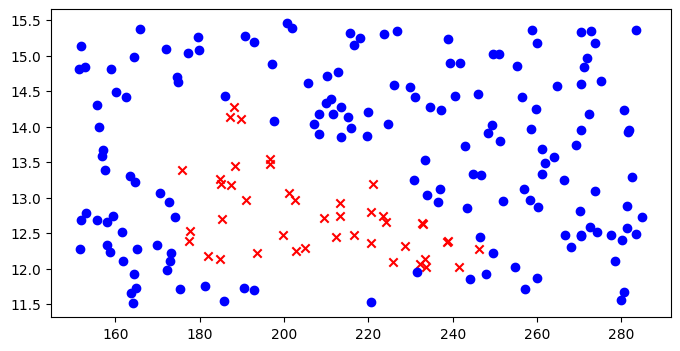

In [25]:
Yr = Y.reshape(-1, )
pos = Yr == 1
neg = Yr == 0

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.scatter(X[pos, 0], X[pos, 1], c="r", marker="x")
ax.scatter(X[neg, 0], X[neg, 1], c="b")

In [26]:
norm_ = tf.keras.layers.Normalization(axis=-1)
norm_.adapt(X)
Xn = norm_(X)

In [28]:
Xt = np.tile(Xn, (1000, 1))
Yt = np.tile(Y, (1000, 1))
print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


In [29]:
model = Sequential(
    [
        tf.keras.Input(2, ),
        Dense(3, activation="relu", name="layer1"),
        Dense(1, activation="sigmoid", name="layer2")
    ]
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)
model.fit(Xt, Yt, epochs=10)

Epoch 1/10
6250/6250 [==============================] - 2s 288us/step - loss: 4.7784e-05
Epoch 2/10
6250/6250 [==============================] - 2s 286us/step - loss: 3.1259e-04
Epoch 3/10
6250/6250 [==============================] - 2s 284us/step - loss: 1.8933e-05
Epoch 4/10
6250/6250 [==============================] - 2s 285us/step - loss: 1.8355e-04
Epoch 5/10
6250/6250 [==============================] - 2s 287us/step - loss: 5.6406e-05
Epoch 6/10
6250/6250 [==============================] - 2s 288us/step - loss: 1.4926e-05
Epoch 7/10
6250/6250 [==============================] - 2s 289us/step - loss: 2.6882e-04
Epoch 8/10
6250/6250 [==============================] - 2s 291us/step - loss: 1.2107e-05
Epoch 9/10
6250/6250 [==============================] - 2s 291us/step - loss: 1.5938e-04
Epoch 10/10
6250/6250 [==============================] - 2s 291us/step - loss: 3.2140e-04


7/7 [==============================] - 0s 909us/step


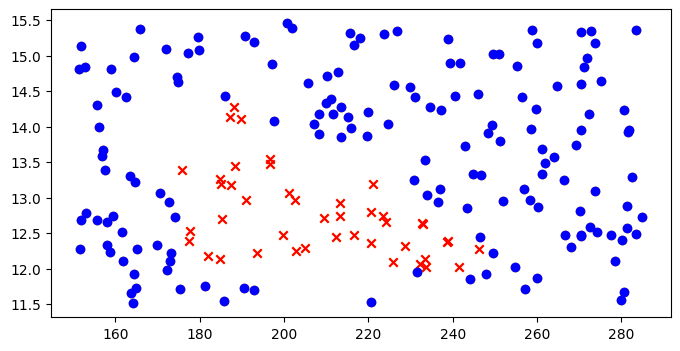

In [48]:
y_pred=model.predict(Xn)

y_pred = Y.reshape(-1, )
pos = y_pred == 1
neg = y_pred == 0

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.scatter(X[pos, 0], X[pos, 1], c="orange", marker="x")
ax.scatter(X[neg, 0], X[neg, 1], c="orange")

Yr = Y.reshape(-1, )
pos = Yr == 1
neg = Yr == 0
ax.scatter(X[pos, 0], X[pos, 1], c="r", marker="x")
ax.scatter(X[neg, 0], X[neg, 1], c="b")

In [46]:
score = model.evaluate(Xn, Y)
print(score)

7/7 [==============================] - 0s 1ms/step - loss: 1.0617e-05
1.0616906365612522e-05
